<a href="https://colab.research.google.com/github/GabriellBP/Effective-TensorFlow/blob/master/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple example

*Original code: [Tensorflow Tutorial](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb)*

**Import the Fashion MNIST dataset**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore the data**

In [0]:
train_images.shape

In [0]:
len(train_labels)

In [0]:
train_labels

In [0]:
test_images.shape

In [0]:
len(test_labels)

**Preprocess the data**

In [0]:
# looking the first imagem of the dataset (the pixel values fall in the range of 0 to 255)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# scale these values to a range of 0 to 1
train_images = train_images / 255.0
# the same for testing set
test_images = test_images / 255.0

In [0]:
# verifying that the data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the model**

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. 
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) # each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', # this is how the model is updated based on the data it sees and its loss function.
              loss='sparse_categorical_crossentropy', # this measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
              metrics=['accuracy']) # used to monitor the training and testing steps.

In [15]:
# training the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.4983 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3777 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3384 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3140 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2982 - acc: 0.8899


In [16]:
# evaluating the model (accuracy)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3786 - acc: 0.8641
Test accuracy: 0.8641


**Make predictions**

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

In [0]:
# which label has the highest confidence value
np.argmax(predictions[0])

In [0]:
# verifying label test
test_labels[0]

In [0]:
# graph this to look at the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
# 0th image, predictions, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

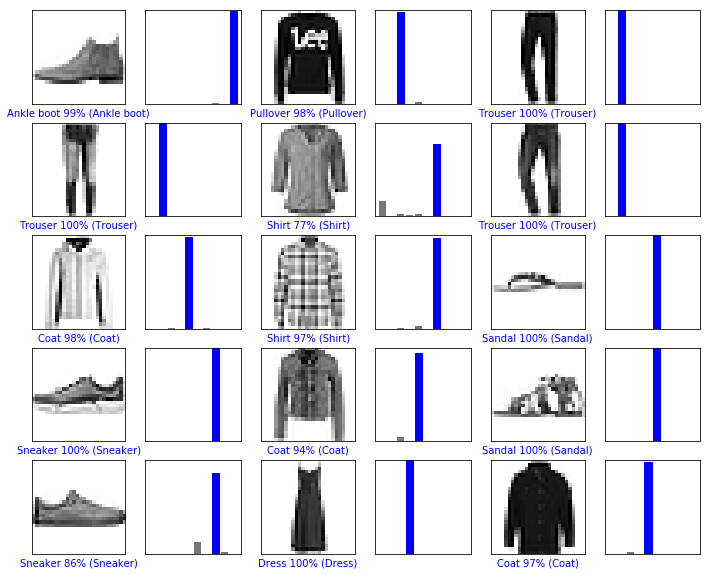

In [26]:
# plot the first X test images, their predicted label, and the true label
# color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
# grab an image from the test dataset
img = test_images[0]

print(img.shape)

In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

In [0]:
predictions_single = model.predict(img)

print(predictions_single)

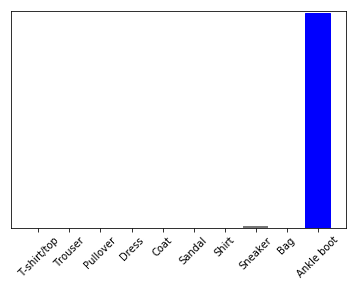

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

9

# Simple example with Tensorflow 2.0

In [0]:
!pip install -q tensorflow==2.0.0-alpha0

*Original code: [Tensorflow 2.0 Tutorial](https://github.com/tensorflow/docs/blob/master/site/en/r2/tutorials/keras/basic_classification.ipynb)*

**Import the Fashion MNIST dataset** - *same way*

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore the data** - *same way*

In [0]:
train_images.shape

In [0]:
len(train_labels)

In [0]:
train_labels

In [0]:
test_images.shape

In [0]:
len(test_labels)

**Preprocess the data** - *same way*

In [0]:
# looking the first imagem of the dataset (the pixel values fall in the range of 0 to 255)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# scale these values to a range of 0 to 1
train_images = train_images / 255.0
# the same for testing set
test_images = test_images / 255.0

In [0]:
# verifying that the data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the model**

*The way that you say the activation type has changed. Before: tf.nn.relu; After: 'relu'*

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
])

In [0]:
model.compile(optimizer='adam', # this is how the model is updated based on the data it sees and its loss function.
              loss='sparse_categorical_crossentropy', # this measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
              metrics=['accuracy']) # used to monitor the training and testing steps.

In [15]:
# training the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5036 - accuracy: 0.8221
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3788 - accuracy: 0.8642
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3392 - accuracy: 0.8763
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3134 - accuracy: 0.8849
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2958 - accuracy: 0.8912


In [16]:
# evaluating the model (accuracy)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3362 - accuracy: 0.8791
Test accuracy: 0.8791


**Make predictions**

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

In [0]:
# which label has the highest confidence value
np.argmax(predictions[0])

In [0]:
# verifying label test
test_labels[0]

In [0]:
# graph this to look at the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
# 0th image, predictions, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

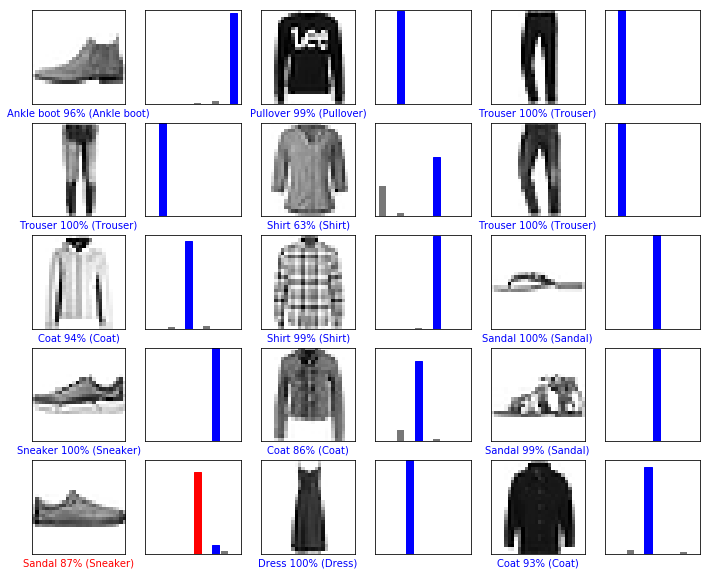

In [23]:
# plot the first X test images, their predicted label, and the true label
# color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
# grab an image from the test dataset
img = test_images[0]

print(img.shape)

In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

In [0]:
predictions_single = model.predict(img)

print(predictions_single)

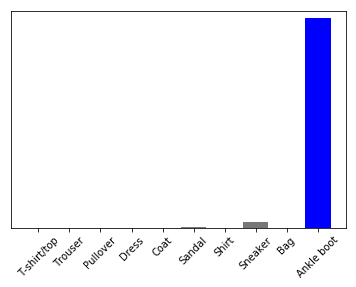

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

9